# Air Quality for Pollution Control using Advanced ML models-

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# 🔹 Upload the file manually
print("📂 Please upload your dataset:")
uploaded = files.upload()

# 🔹 Get the file name dynamically
file_name = list(uploaded.keys())[0]


📂 Please upload your dataset:


Saving 22nd_feb.csv to 22nd_feb.csv


In [ ]:
# 🔹 Load the dataset
df = pd.read_csv(file_name)

# Display dataset info before cleaning
print("\n🔍 Dataset Info (Before Cleaning):")
df.info()

# 🔹 Handle Missing Values
# - Fill missing pollutant values using interpolation (better than just median)
df[['pollutant_min', 'pollutant_max', 'pollutant_avg']] = df[['pollutant_min', 'pollutant_max', 'pollutant_avg']].interpolate()

# 🔹 Convert `last_update` to datetime format
df['last_update'] = pd.to_datetime(df['last_update'], format='%d-%m-%Y %H:%M:%S')

# 🔹 Feature Engineering: Extract Time-Based Features
df['year'] = df['last_update'].dt.year
df['month'] = df['last_update'].dt.month
df['day'] = df['last_update'].dt.day
df['hour'] = df['last_update'].dt.hour
df['weekday'] = df['last_update'].dt.weekday  # Monday = 0, Sunday = 6

# 🔹 Drop original datetime column after extracting features
df.drop(columns=['last_update'], inplace=True)

# Display dataset info after cleaning
print("\n✅ Dataset Info (After Cleaning):")
df.info()

# 🔹 Save the cleaned dataset
cleaned_file = "cleaned_air_quality.csv"
df.to_csv(cleaned_file, index=False)
print(f"\n✅ Preprocessing Complete! Saved as '{cleaned_file}'")

# 🔹 Download the cleaned dataset
files.download(cleaned_file)


🔍 Dataset Info (Before Cleaning):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3237 non-null   object 
 1   state          3237 non-null   object 
 2   city           3237 non-null   object 
 3   station        3237 non-null   object 
 4   last_update    3237 non-null   object 
 5   latitude       3237 non-null   float64
 6   longitude      3237 non-null   float64
 7   pollutant_id   3237 non-null   object 
 8   pollutant_min  3074 non-null   float64
 9   pollutant_max  3074 non-null   float64
 10  pollutant_avg  3074 non-null   float64
dtypes: float64(5), object(6)
memory usage: 278.3+ KB

✅ Dataset Info (After Cleaning):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
# 🔹 Upload the file manually
print("📂 Please upload your dataset:")
uploaded = files.upload()

# 🔹 Get the file name dynamically
file_name = list(uploaded.keys())[0]

📂 Please upload your dataset:


Saving cleaned_air_quality.csv to cleaned_air_quality (1).csv


In [ ]:


# Load cleaned dataset
df = pd.read_csv(file_name)

# 1. Basic Statistics and Thresholds
WHO_THRESHOLDS = {
    'PM2.5': 25,
    'PM10': 50,
    'SO2': 40,
    'NO2': 40,
    'CO': 4,
    'OZONE': 100,
    'NH3': 100
}


<ipython-input-27-48df95a7961f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_pollution.values, y=city_pollution.index, palette='viridis')


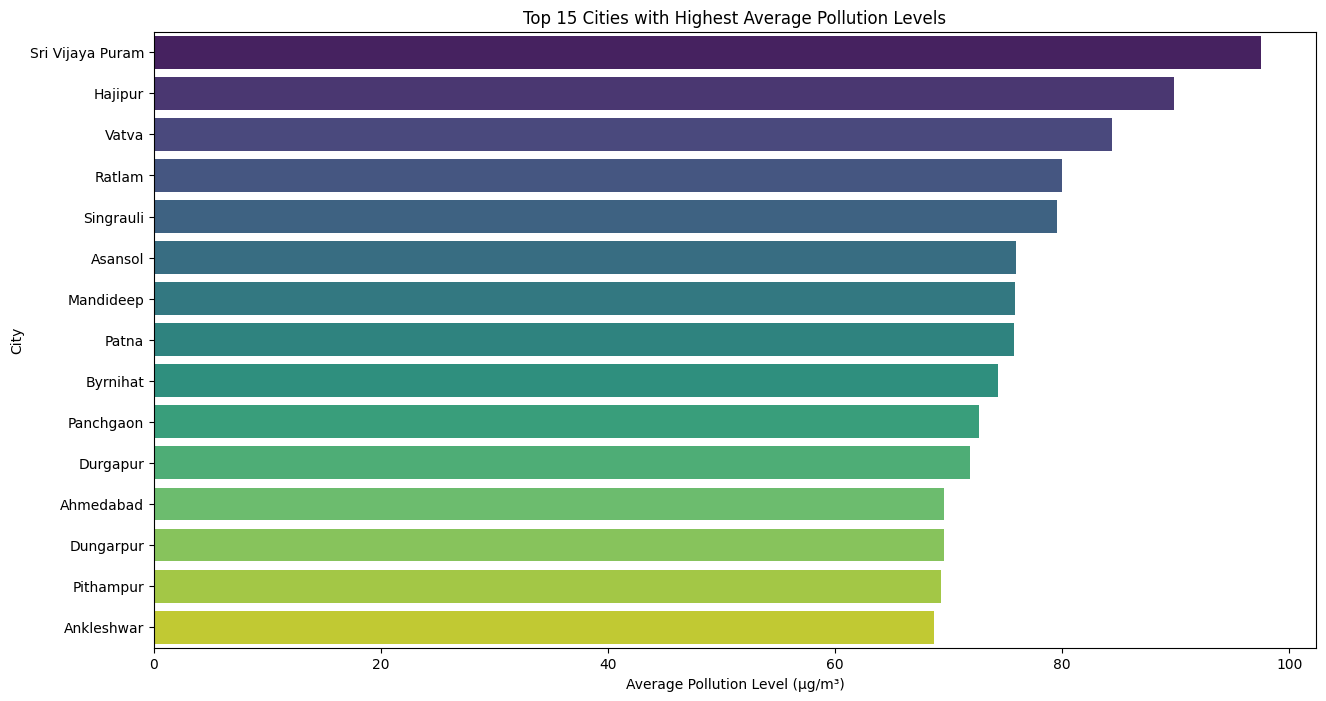

In [ ]:
# 2. Visualization: Pollution Distribution by City
plt.figure(figsize=(15, 8))
city_pollution = df.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False)[:15]
sns.barplot(x=city_pollution.values, y=city_pollution.index, palette='viridis')
plt.title('Top 15 Cities with Highest Average Pollution Levels')
plt.xlabel('Average Pollution Level (µg/m³)')
plt.ylabel('City')
plt.show()


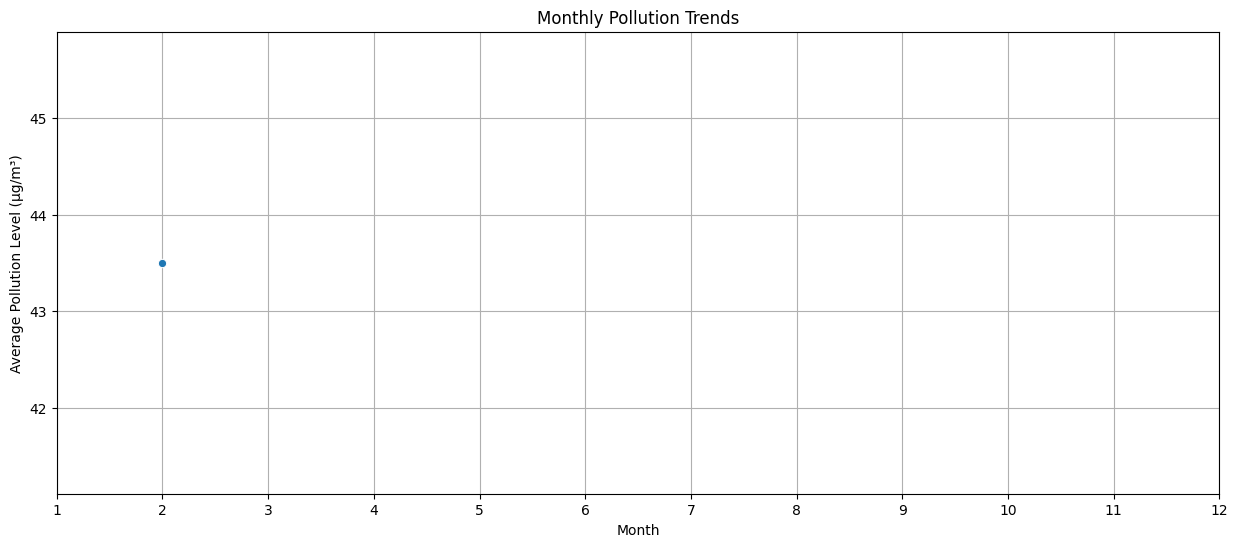

In [ ]:
# 3. Time Series Analysis
plt.figure(figsize=(15, 6))
monthly_trend = df.groupby('month')['pollutant_avg'].mean()
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o')
plt.title('Monthly Pollution Trends')
plt.xlabel('Month')
plt.ylabel('Average Pollution Level (µg/m³)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


In [ ]:
# 4. Geographical Heatmap
pollution_map = folium.Map(location=[20.5937, 78.9629], zoom_start=4.5)
heat_data = [[row['latitude'], row['longitude'], row['pollutant_avg']] for _, row in df.iterrows()]
HeatMap(heat_data, radius=15).add_to(pollution_map)
pollution_map.save('pollution_heatmap_new.html')

In [ ]:
# 5. Identify High Pollution Cities
def identify_high_pollution(pollutant):
    city_stats = df[df['pollutant_id'] == pollutant].groupby('city')['pollutant_avg'].max()
    return city_stats[city_stats > WHO_THRESHOLDS[pollutant]].sort_values(ascending=False)

high_pm25 = identify_high_pollution('PM2.5')
high_pm10 = identify_high_pollution('PM10')

print("\n🚨 Cities Exceeding WHO PM2.5 Threshold:")
print(high_pm25)
print("\n🚨 Cities Exceeding WHO PM10 Threshold:")
print(high_pm10)



🚨 Cities Exceeding WHO PM2.5 Threshold:
city
Patna            297.0
Hajipur          284.0
Muzaffarpur      278.0
Delhi            268.0
Gaya             268.0
                 ...  
Rishikesh         28.0
Samastipur        28.0
Sasaram           27.5
Rajgir            27.0
Palkalaiperur     26.0
Name: pollutant_avg, Length: 235, dtype: float64

🚨 Cities Exceeding WHO PM10 Threshold:
city
Patna           248.0
Howrah          232.0
Gaya            223.0
Aurangabad      210.0
Durgapur        208.0
                ...  
Mysuru           52.0
Hubballi         52.0
Virudhunagar     52.0
Madurai          52.0
Shivamogga       51.0
Name: pollutant_avg, Length: 213, dtype: float64


In [ ]:
# 6. Real-time Alerts (Using latest data)
# Group by city and pollutant_id, and get the last recorded pollutant_max for each group
current_alerts = df.groupby(['city', 'pollutant_id'])['pollutant_max'].last()

# Convert WHO_THRESHOLDS to a Series for mapping
threshold_series = pd.Series(WHO_THRESHOLDS)

# Map each pollutant_id in the multi-index to its threshold and create a mask for values exceeding the threshold
mask = current_alerts > current_alerts.index.get_level_values('pollutant_id').map(threshold_series)
current_alerts = current_alerts[mask].reset_index()

# Extract unique city names from the alerts and print them
alert_cities = current_alerts['city'].unique()
print("\n🔔 Cities with High Pollution Alerts:")
for city in alert_cities:
    print(city)


🔔 Cities with High Pollution Alerts:
Agartala
Agra
Ahmedabad
Ahmednagar
Aizawl
Ajmer
Akola
Alwar
Amaravati
Amravati
Amritsar
Anantapur
Angul
Ankleshwar
Araria
Ariyalur
Arrah
Asansol
Aurangabad
Baddi
Badlapur
Baghpat
Balasore
Banswara
Baran
Barbil
Bareilly
Baripada
Barmer
Barrackpore
Bathinda
Begusarai
Belapur
Belgaum
Bengaluru
Bettiah
Bhagalpur
Bharatpur
Bhilai
Bhilwara
Bhiwadi
Bhiwandi
Bhopal
Bhubaneswar
Bihar Sharif
Bikaner
Bilaspur
Bileipada
Boisar
Brajrajnagar
Bulandshahr
Bundi
Buxar
Byasanagar
Byrnihat
Chamarajanagar
Chandigarh
Chandrapur
Charkhi Dadri
Chennai
Chhal
Chikkaballapur
Chittoor
Chittorgarh
Churu
Coimbatore
Cuddalore
Cuttack
Damoh
Dausa
Davanagere
Dehradun
Delhi
Dewas
Dhanbad
Dharwad
Dholpur
Dhule
Dindigul
Dungarpur
Durgapur
Eloor
Faridabad
Firozabad
Gandhinagar
Gangtok
Gaya
Ghaziabad
Gorakhpur
Greater Noida
Gummidipoondi
Gurugram
Guwahati
Gwalior
Hajipur
Haldia
Hanumangarh
Hapur
Hassan
Howrah
Hubballi
Hyderabad
Imphal
Indore
Jabalpur
Jaipur
Jaisalmer
Jalandhar
Jalgaon

<ipython-input-33-1779fb0f6658>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pollutant_dist.values, y=pollutant_dist.index, palette='rocket')


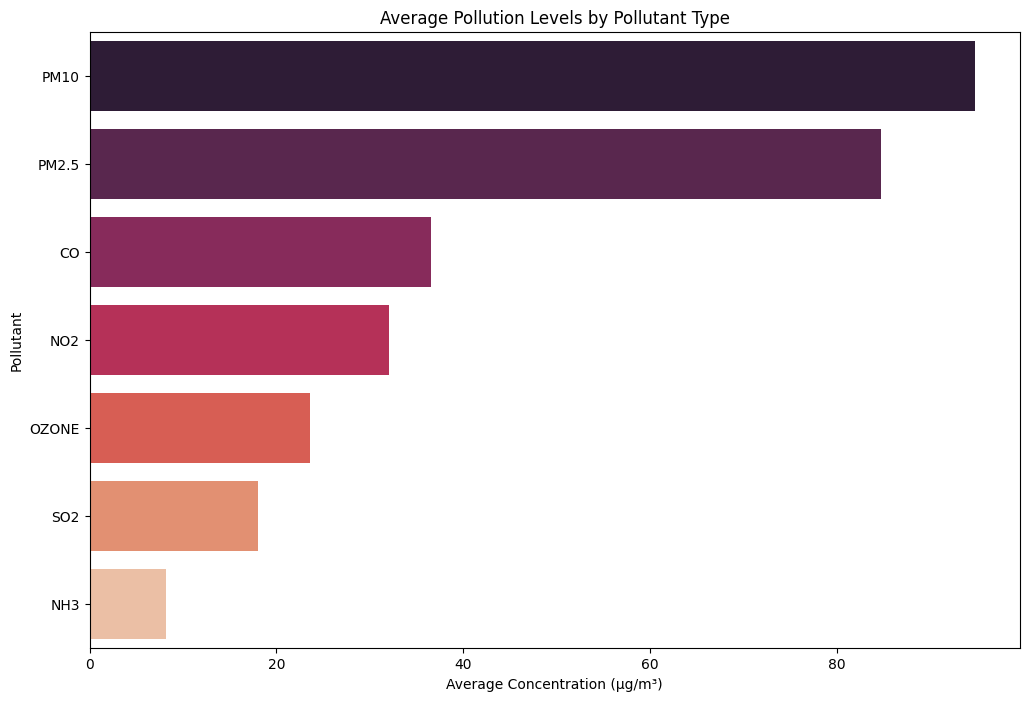

In [ ]:
# 7. Pollution Composition Analysis
plt.figure(figsize=(12, 8))
pollutant_dist = df.groupby('pollutant_id')['pollutant_avg'].mean().sort_values(ascending=False)
sns.barplot(x=pollutant_dist.values, y=pollutant_dist.index, palette='rocket')
plt.title('Average Pollution Levels by Pollutant Type')
plt.xlabel('Average Concentration (µg/m³)')
plt.ylabel('Pollutant')
plt.show()

In [ ]:
# 8. Worst Performing Stations
worst_stations = df.groupby(['city', 'station'])['pollutant_avg'].max().nlargest(10)
print("\n🔴 Worst Performing Monitoring Stations:")
print(worst_stations)


🔴 Worst Performing Monitoring Stations:
city              station                              
Sri Vijaya Puram  Police Line, Sri Vijaya Puram - ANPCC    331.0
Patna             DRM Office Danapur, Patna - BSPCB        297.0
                  Muradpur, Patna - BSPCB                  292.0
Hajipur           Industrial Area, Hajipur - BSPCB         284.0
Muzaffarpur       Buddha Colony, Muzaffarpur - BSPCB       278.0
Delhi             Lodhi Road, Delhi - IITM                 268.0
Gaya              Kareemganj, Gaya - BSPCB                 268.0
Ahmedabad         Rakhial, Ahmedabad - IITM                265.0
                  Gyaspur, Ahmedabad - IITM                259.0
Delhi             Mundka, Delhi - DPCC                     257.0
Name: pollutant_avg, dtype: float64


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files


📂 Please upload your cleaned air quality dataset (CSV file):


Saving cleaned_air_quality.csv to cleaned_air_quality (3).csv
Uploaded file: cleaned_air_quality (3).csv
Creating 'datetime' column from year, month, day, and hour columns.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0199 - val_loss: 0.0299
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0157 - val_loss: 0.0306
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0165 - val_loss: 0.0297
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0171 - val_loss: 0.0296
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0166 - val_loss: 0.0306
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0186 - val_loss: 0.0302
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - val_loss: 0.0308
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - val_loss: 0.0296
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0161 - val_loss: 0.0295
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0185 - val_loss: 0.0301
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0166 - val_loss: 0.0306
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0

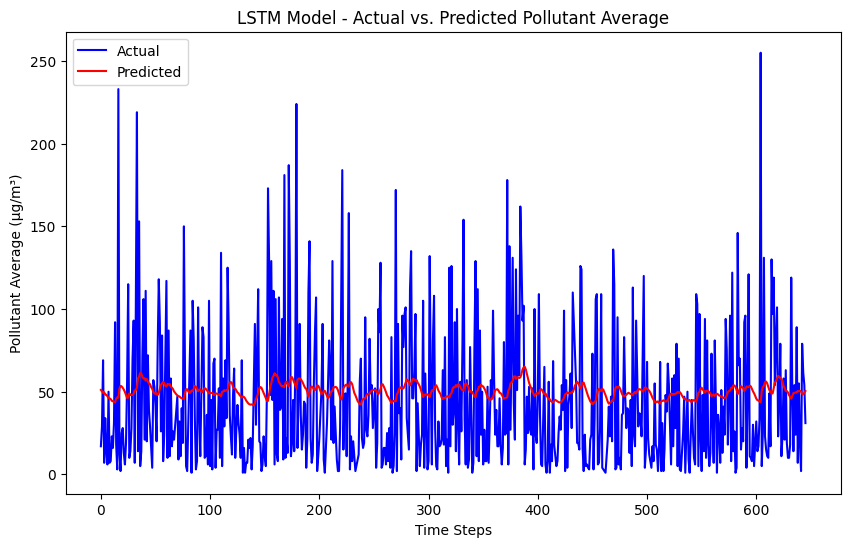

In [ ]:


# ----------------------------
# 1. Upload Dataset
# ----------------------------
print("📂 Please upload your cleaned air quality dataset (CSV file):")
uploaded = files.upload()

# Get the uploaded file name (assuming one file is uploaded)
file_name = list(uploaded.keys())[0]
print("Uploaded file:", file_name)

# ----------------------------
# 2. Load and Preprocess Data
# ----------------------------
df = pd.read_csv(file_name)

# Check if 'datetime' column exists; if not, try to create it from 'year', 'month', 'day', and 'hour'
if 'datetime' not in df.columns:
    if all(col in df.columns for col in ['year', 'month', 'day', 'hour']):
        print("Creating 'datetime' column from year, month, day, and hour columns.")
        df['datetime'] = df.apply(lambda row: pd.Timestamp(year=row['year'],
                                                           month=row['month'],
                                                           day=row['day'],
                                                           hour=row['hour']), axis=1)
    else:
        raise KeyError("The dataset must contain a 'datetime' column or the columns: 'year', 'month', 'day', and 'hour'.")

# Sort data by datetime to maintain time series order
df = df.sort_values('datetime')

# Ensure the target column exists
if 'pollutant_avg' not in df.columns:
    raise KeyError("The dataset must contain a 'pollutant_avg' column.")

# Use the pollutant_avg column as our target variable
data = df[['pollutant_avg']].values

# Scale the data to [0, 1] for LSTM training
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences using a sliding window
def create_dataset(dataset, look_back=10):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(y)

look_back = 10
X, y = create_dataset(scaled_data, look_back)

# Reshape X to be [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ----------------------------
# 3. Build and Train the LSTM Model
# ----------------------------
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary for technical details
model.summary()

# Train the model with EarlyStopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.1, callbacks=[early_stop], verbose=1)

# ----------------------------
# 4. Evaluate the Model
# ----------------------------
test_loss = model.evaluate(X_test, y_test)
print("\nTest Loss (MSE):", test_loss)

# Predict on test set and inverse-transform to original scale
predictions = model.predict(X_test)
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate additional evaluation metrics
mse = mean_squared_error(y_test_inv, predictions_inv)
mae = mean_absolute_error(y_test_inv, predictions_inv)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# ----------------------------
# 5. Plot Actual vs. Predicted Values
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual', color='blue')
plt.plot(predictions_inv, label='Predicted', color='red')
plt.title("LSTM Model - Actual vs. Predicted Pollutant Average")
plt.xlabel("Time Steps")
plt.ylabel("Pollutant Average (µg/m³)")
plt.legend()
plt.show()
